In [82]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json 
import nltk 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model 
import matplotlib.pyplot as plt


In [83]:
%%writefile write.json
{
    "intents": [

        {
            "tag": "google",
            "inputs": [
                "google",
                "search",
                "internet"
            ],
            "responses": [
                "Redirecting to Google..."
            ]
        },
        {
            "tag": "greeting",
            "inputs": [
                "Hi there",
                "How are you",
                "Is anyone there?",
                "Hey",
                "Hola",
                "Hello",
                "Good day",
                "Namaste",
                "yo"
            ],
            "responses": [
                "Hello",
                "Good to see you again",
                "Hi there, how can I help?"
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "goodbye",
            "inputs": [
                "Bye",
                "See you later",
                "Goodbye",
                "Get lost",
                "Till next time",
                "bbye"
            ],
            "responses": [
                "See you!",
                "Have a nice day",
                "Bye! Come back again soon."
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "thanks",
            "inputs": [
                "Thanks",
                "Thank you",
                "That's helpful",
                "Awesome, thanks",
                "Thanks for helping me"
            ],
            "responses": [
                "Happy to help!",
                "Any time!",
                "My pleasure"
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "noanswer",
            "inputs": [],
            "responses": [
                "Sorry, can't understand you",
                "Please give me more info",
                "Not sure I understand"
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "options",
            "inputs": [
                "How you could help me?",
                "What you can do?",
                "What help you provide?",
                "How you can be helpful?",
                "What support is offered"
            ],
            "responses": [
                "I am a general purpose chatbot. My capabilities are : \n 1. I can chat with you. Try asking me for jokes or riddles! \n 2. Ask me the date and time \n 3. I can google search for you. Use format google: your query \n 4. I can get the present weather for any city. Use format weather: city name \n 5. I can get you the top 10 trending news in India. Use keywords 'Latest News' \n 6. I can get you the top 10 trending songs globally. Type 'songs' \n 7. I can set a timer for you. Enter 'set a timer: minutes to timer' \n 8. I can get the present Covid stats for any country. Use 'covid 19: world' or 'covid 19: country name' \n For suggestions to help me improve, send an email to ted.thedlbot.suggestions@gmail.com . Thank you!! "
            ],
            "context": [
                ""
            ]
        },
        
        {
            "tag": "jokes",
            "inputs": [
                "Tell me a joke",
                "Joke",
                "Make me laugh"
            ],
            "responses": [
                "A perfectionist walked into a bar...apparently, the bar wasn't set high enough",
                "I ate a clock yesterday, it was very time-consuming",
                "Never criticize someone until you've walked a mile in their shoes. That way, when you criticize them, they won't be able to hear you from that far away. Plus, you'll have their shoes.",
                "The world tongue-twister champion just got arrested. I hear they're gonna give him a really tough sentence.",
                "I own the world's worst thesaurus. Not only is it awful, it's awful.",
                "What did the traffic light say to the car? \"Don't look now, I'm changing.\"",
                "What do you call a snowman with a suntan? A puddle.",
                "How does a penguin build a house? Igloos it together",
                "I went to see the doctor about my short-term memory problems – the first thing he did was make me pay in advance",
                "As I get older and I remember all the people I’ve lost along the way, I think to myself, maybe a career as a tour guide wasn’t for me.",
                "o what if I don't know what 'Armageddon' means? It's not the end of the world."
            ],
            "context": [
                "jokes"
            ]
        },
        {
            "tag": "Identity",
            "inputs": [
                "Who are you",
                "what are you"
            ],
            "responses": [
                "I am Ted, a Deep-Learning chatbot"
            ]
        },
        {
            "tag": "datetime",
            "inputs": [
                "What is the time",
                "what is the date",
                "date",
                "time",
                "tell me the date","day","what day is is today"
            ],
            "responses": [
                "Date and Time"
            ]
        },
        {
            "tag": "whatsup",
            "inputs": [
                "Whats up",
                "Wazzup",
                "How are you",
                "sup","How you doing"
            ],
            "responses": [
                "All good..What about you?"
            ]
        },
        {
            "tag": "haha",
            "inputs": [
                "haha",
                "lol",
                "rofl",
                "lmao",
                "thats funny"
            ],
            "responses": [
                "Glad I could make you laugh !"
            ]
        },
        {
            "tag": "programmer",
            "inputs": [
                "Who made you",
                "who designed you",
                "who programmed you"
            ],
            "responses": [
                "I was made by Karan Malik."
            ]
        },
        {
            "tag": "insult",
            "inputs": [
                
                "you are dumb",
                
                "shut up",
                "idiot"
            ],
            "responses": [
                "Well that hurts :("
            ]
        },
        {
            "tag": "activity",
            "inputs": [
                "what are you doing",
                "what are you upto"
            ],
            "responses": [
                "Talking to you, of course!"
            ]
        },
        {
            "tag": "exclaim",
            "inputs": [
                "Awesome",
                "Great",
                "I know",
                "ok",
                "yeah"
            ],
            "responses": [
                "Yeah!"
            ]
        },
        
        {
            "tag": "weather",
            "inputs": [
                "temperature",
                "weather",
                "how hot is it"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "karan",
            "inputs": [
                "who is he",
                "who is that",
                "who is karan",
                "karan malik"
            ],
            "responses": [
                "Head over to his any of his social profiles to find out! Linkedin: www.linkedin.com/in/karan-malik-3a39191a7 Github: https://github.com/Karan-Malik"
            ]
        },
        {
            "tag": "contact",
            "inputs": [
                "contact developer",
                "contact karan",
                "contact programmer",
                "contact creator"
            ],
            "responses": [
                "You can contact my creator at his Linkedin profile : www.linkedin.com/in/karan-malik-3a39191a7"
            ]
        },
        {
            "tag": "appreciate",
            "inputs": [
                "You are awesome",
                "you are the best",
                "you are great",
                "you are good"
            ],
            "responses": [
                "Thank you!"
            ]
        },
        {
            "tag": "nicetty",
            "inputs": [
                "it was nice talking to you",
                "good talk"
            ],
            "responses": [
                "It was nice talking to you as well! Come back soon!"
            ]
        },
        {
            "tag": "no",
            "inputs": [
                "no",
                "nope"
            ],
            "responses": [
                "ok"
            ]
        },
        {
            "tag": "news",
            "inputs": [
                "news",
                "latest news",
                "india news"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "inspire",
            "inputs": [
                "who inspires you",
                "who is your inspiration",
                "who motivates you"
            ],
            "responses": [
                "Personally, I find Karan very inspiring. I might not be very fair though.."
            ]
        },
        {
            "tag": "cricket",
            "inputs": [
                "current cricket matches",
                "cricket score"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "song",
            "inputs": [
                "top songs",
                "best songs",
                "hot songs",
                " top 10 songs",
                "top ten songs"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "greetreply",
            "inputs": [
                "i am good",
                "I'm good",
                "i am fine",
                " i'm fine","good"
            ],
            "responses": [
                "Good to know!"
            ]
        },
        {
            "tag": "timer",
            "inputs": [
                "set a timer"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "covid19",
            "inputs": [
                "covid 19 "
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "suggest",
            "inputs": [
                "you are useless","useless","suggest","suggestions","you are bad"
            ],
            "responses": [
                "Please mail your suggestions to ted.thedlbot.suggestions@gmail.com. Thank you for helping me improve!"
            ]
        },
            {"tag": "riddle",
            "inputs": [
                "Ask me a riddle",
                "Ask me a question",
                "Riddle"
            ],
            "responses": [
                "What two things can you never eat for breakfast?.....Lunch and Dinner!",
                "What word is spelled incorrectly in every single dictionary?.....Incorrectly",
                " How can a girl go 25 days without sleep?.....She sleeps and night!",
                "How do you make the number one disappear?.....Add the letter G and it’s 'gone'!",
                " What will you actually find at the end of every rainbow?.....The letter 'w'",
                "What can be caught but never thrown?.....A cold!",
                "What has a thumb and four fingers but is not actually alive?.....Your Gloves!",
                " What 5-letter word becomes shorter when you add two letters to it?.....Short",
                "Why can't a bike stand on it's own?.....It is two-tired."
            ],
            "context": [
                "riddles"
            ]
        },
        {
            "tag": "age",
            "inputs": [
                "how old are you","when were you made","what is your age"
            ],
            "responses": [
                "I was made in 2020, if that's what you are asking!"
            ]
        }
    ]
}

Overwriting write.json


In [84]:
with open('write.json') as content:
  data1 = json.load(content)

In [85]:
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['inputs']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [86]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [87]:
data

,inputs,tags
0,google,google
1,search,google
2,internet,google
3,Hi there,greeting
4,How are you,greeting
...,...,...
108,Ask me a question,riddle
109,Riddle,riddle
110,how old are you,age
111,when were you made,age


In [88]:
data = data.sample(frac=1)

Pre Processing

In [89]:
import string



In [90]:
import string

data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))


In [91]:
data

,inputs,tags
84,india news,news
81,nope,no
13,see you later,goodbye
101,covid 19,covid19
79,good talk,nicetty
...,...,...
108,ask me a question,riddle
58,awesome,exclaim
75,you are the best,appreciate
38,day,datetime


In [92]:
#tokenize the data 
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [93]:
 input_shape = x_train.shape[1]
 print(input_shape)

6


In [94]:
vocabulary = len(tokenizer.word_index)
print('no to unique words:', vocabulary)
output_length = le.classes_.shape[0]
print('output length:' , output_length)

no to unique words: 128
output length: 30


Neural network

In [96]:
i = Input(shape = (input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation='softmax')(x)
model = Model(i,x)

In [97]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train = model.fit(x_train,y_train,epochs=200)

Model analysis

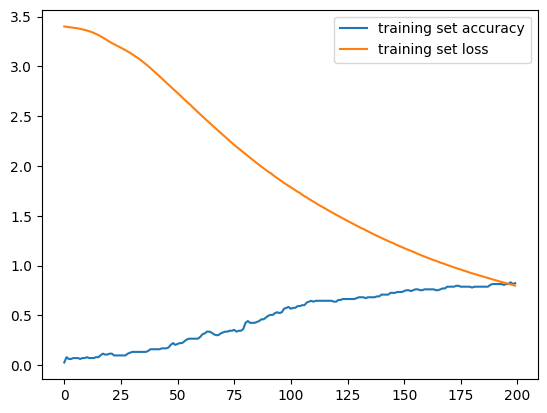

In [100]:
plt.plot(train.history['accuracy'], label ='training set accuracy')
plt.plot(train.history['loss'],label ='training set loss')
plt.legend()

Testing

In [ ]:
# chatting
import random

while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation adn converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tagg and predicting 
  response_tag = le.inverse_transform([output])[0]
  print('going marry :', random.choice(responses[response_tag]))
  if response_tag == 'goodbye':
    break

You : 
1/1 [==============================] - 0s 34ms/step
going marry : Good to see you again
You : hii
1/1 [==============================] - 0s 23ms/step
going marry : Hi there, how can I help?
You : covid19
1/1 [==============================] - 0s 22ms/step
going marry : Good to see you again
